In [1]:
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('2.jpeg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)

In [ ]:
w,h,ch = gray.shape
roi = gray[0:w,0:h]
roi = roi.astype("uint8")

In [ ]:
ret,th = cv2.threshold(gray,50,255,cv2.THRESH_BINARY)

In [ ]:
filter_img = cv2.bilateralFilter(th,11,15,15)
edges = cv2.Canny(filter_img,30,200)
cont = cv2.findContours(edges.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cont = imutils.grab_contours(cont)
cont = sorted(cont,key=cv2.contourArea,reverse=True)[:4]

pos = []
for i in cont:
  approx = cv2.approxPolyDP(i,12,True)
  if len(approx)==4:
    pos.append(approx)


In [ ]:
mask = np.zeros(gray.shape,np.uint8)


for i in pos:
  new_img = cv2.drawContours(mask,[i],0,(255,255,255),-1)
  bit_img = cv2.bitwise_and(roi,roi,mask=mask)
  plt.imshow(bit_img)
  plt.show()

error: ignored

In [ ]:
print(bit_img[0])
print(np.mean(bit_img[0]))

[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]
0.0


In [ ]:
nn = []
for i in bit_img:
  if np.mean(i)>0:
    nn.append(i)

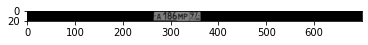

In [ ]:
plt.imshow(nn)
plt.show()